## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('data/ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [4]:
# 모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.530, 206.669)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   ,
        0.   , 0.003, 0.003, 0.   , 0.003, 0.   , 0.   , 0.003, 0.   ,
        0.   , 0.   , 0.003, 0.   , 0.003, 0.005, 0.007, 0.007, 0.   ,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.01 , 0.   , 0.022, 0.003,
        0.02 , 0.025, 0.02 , 0.025, 0.02 , 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.02 , 0.015, 0.033, 0.04 , 0.028, 0.025, 0.018,
        0.022, 0.02 , 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.02 , 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.02 , 0.015, 0.01 , 0.007, 0.   , 0.013, 0.005, 0.003,
        0.013]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.

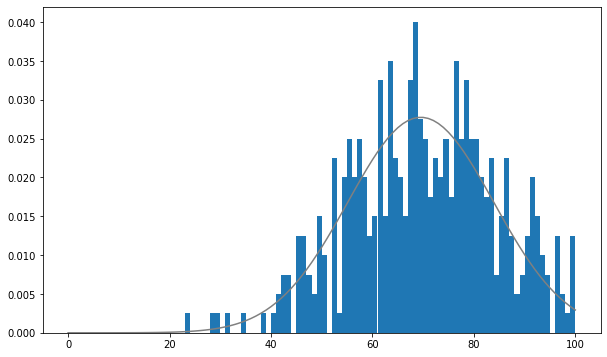

In [6]:
# 모집단이 정규분포를 이룬다고 가정하여 추정 수행
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean,np.sqrt(p_var))

plt.plot(xs,rv.pdf(xs),color='gray')
plt.hist(scores,bins=100,range=(0,100),density=True)

In [7]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [9]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

## 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [12]:
df = pd.read_csv('data/ch4_scores400.csv')
print('모평균:', df.score.mean())

np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

sample_means = np.mean(samples,axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본평균, 분산 :', np.mean(sample_means), np.mean(sample_u_vars))

모평균: 69.53
모분산: 207.18706766917293
표본평균, 분산 : 69.53799999999998 206.67808263157895


In [13]:
# 표본평균의 평균
sample_means = np.mean(samples,axis=1)
np.mean(sample_means)

69.538

In [14]:
# 표본크기를 백만으로 할 때의 표본평균
np.mean(np.random.choice(scores,int(1e6)))

69.543

In [16]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

70.400

In [17]:
np.var(scores)

206.669

#### 과제_0905_1
p266~p291 예제 코드를 풀어보세요

#### 과제_0905_2
- 다음 용어를 예를들어 설명하세요.
  불편성, 일치성, 불편분산<br> 
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.

## 통계적 가설검정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
%precision 3

'%.3f'

In [8]:
# 감자튀김의 무게 데이터
df = pd.read_csv('data/ch11_potato.csv')
print(df.head(),'\n')
print(len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 

14


In [9]:
# 표본평균
sample = np.array(df['무게'])
s_mean = np.mean(sample)
s_mean

128.451

통계적 가설검정이란 : <br>
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준


In [12]:
# 모평균이 알려진 감자튀김 무게 평균 130g 보다 적은지 여부(모집단이 정규분포를 따르고 모분산은 9)
rv = stats.norm(130, np.sqrt(9/14))
print(rv.mean(),rv.std(),'\n')
print(rv.rvs(10),'\n')
rv.isf(0.95), rv.ppf(0.05)

130.0 0.8017837257372732 

[129.814 129.117 129.955 131.263 130.052 131.269 130.669 129.161 129.696
 129.935] 



(128.681, 128.681)

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

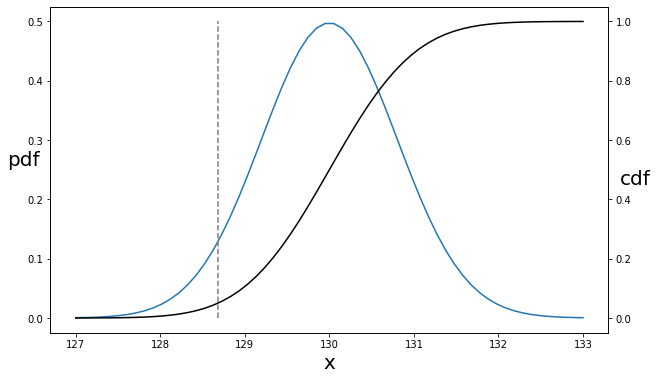

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)
ax1.set_ylim


In [13]:
# 검정통계량 z : 표본평균을 표준화
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [14]:
# 임곗값
rv = stats.norm()
rv.isf(0.95)

-1.645

In [15]:
# 검정통계량으로 부터 p값 산출
# p값이 유의수준 0.05보다 작으므로 귀무가설 기각
rv.cdf(z)

0.027

### 단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다.
- 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행


In [16]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [17]:
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [18]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
rv.cdf(z) * 2

0.053

#### 가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


In [19]:
# 실제로 평균은 130g인 상황 고려 N(130,9)
rv = stats.norm(130,3)

In [21]:
# 1종 오류를 범할 비율 : 위험률이라 하며 유의수준과 일치하므로 분석가가 제어할 수 있는 확률임
c = stats.norm().isf(0.95)
print('임곗값:', c)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_-130) / np.sqrt(9/14)
    if z < c: # 검정통계량 < 임곗값 
        cnt += 1
cnt / n_samples

임곗값: -1.6448536269514722


0.051

In [22]:
# 2종 오류를 범하는 비율 : 1-베타, 검정력, 분석가가 제어할 수 없는 확률
rv = stats.norm(128,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_-130) / np.sqrt(9/14)
    if z >= c: # 검정통계량 >= 임곗값 
        cnt += 1
cnt / n_samples

0.202

#### 과제_0907_1
p308 ~ 331 예제 풀기(윌콕슨, 만위트니는 제외)

#### 카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.


In [23]:
ad_df = pd.read_csv('data/ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [24]:
# 교차집계표
ad_cross = pd.crosstab(ad_df['광고'],ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [25]:
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [26]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [27]:
# 기대도수
ad_ef = pd.DataFrame({'했다':[n_adA*n_yes/n,
                          n_adB*n_yes/n],
                    '하지 않았다':[n_adA*n_not/n,
                             n_adB*n_not/n]},
                     index = ['A','B'])
ad_ef


,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [28]:
# 기대도수와 관측도수의 차이를 측정함으로써 검정 수행
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.750

In [29]:
# 귀무가설은 채택되고 광고A와 광고B에 유의한 차이가 인정되지 않는다는 결론
rv = stats.chi2(1)
1 - rv.cdf(y)

0.053

In [31]:
# 검정통계량, p값, 자유도, 기대도수
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof, ef

(3.750,
 0.053,
 1,
 array([[360.,  40.],
        [540.,  60.]]))

#### 과제_0907_2
카이제곱 검정을 이용하여 독립성 검정을 수행하는 사례를 작성하여 설명하세요. 